In [83]:
# CH3 Classification

# Imports

# Sklearn
from sklearn.datasets import fetch_openml
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.metrics import confusion_matrix

# Data
import pandas as pd
import numpy as np
import sympy as sp

# Visualization
import matplotlib.pyplot as plt
from IPython.display import display

In [58]:
# MNIST data
mnist = fetch_openml("mnist_784", version=1, as_frame=False)

In [59]:
# Keys
mnist.keys()

dict_keys(['data', 'target', 'frame', 'categories', 'feature_names', 'target_names', 'DESCR', 'details', 'url'])

In [71]:
# Load features and targets
X, y = mnist["data"], mnist["target"]
print(f"Container type: {type(X)} | Element type: {X.dtype}")
print(f"Container type: {type(y)} | Element type: {y.dtype}")

Container type: <class 'numpy.ndarray'> | Element type: float64
Container type: <class 'numpy.ndarray'> | Element type: object


X type: <class 'numpy.ndarray'> | y type: <class 'numpy.ndarray'>


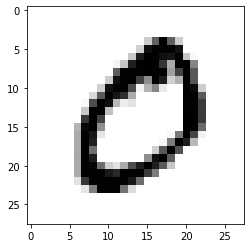

In [65]:
# Inspect
print(f"X type: {type(X)} | y type: {type(y)}")
first_record = X[1]  # Image
some_digit_image = first_record.reshape(28, 28)  # pixel dims
plt.imshow(some_digit_image, cmap='binary')

In [66]:
# Label for above image
print(f"The label for row 1 is the number: {y[0]} of {type(y[0])}")

The label for row 1 is the number: 5 of <class 'str'>


In [67]:
# Divide testing and training 
y = y.astype(np.uint8)  # Convert to byte length unsigned int
bound = 60000
X_train, X_test, y_train, y_test = X[ : bound], X[bound : ], y[ : bound], y[bound : ]

In [69]:
# BINARY CLASSIFIER FOR num 5
y_train_5 = (y_train == 5)
y_test_5 = (y_test == 5)
sgd_clf = SGDClassifier(random_state=42)
sgd_clf.fit(X_train, y_train_5)

SGDClassifier(random_state=42)

In [75]:
# Get list of accuracies using k folds and SGD Classifier
# scoring="accuracy" requires exact match of predicted label and actual label
# cv tells how many experiments to conduct and (?) also divides the total amount of records
# into total/k folds
score = cross_val_score(sgd_clf, X_train, y_train_5, scoring="accuracy", cv=3)
print(score)

[0.95035 0.96035 0.9604 ]


In [78]:
# CONFUSION MATRIX
# Use cross_val_predict to get set of predictions made on each test fold
# created in the kth cross val experiment

# Predictions for whether a number is 5 (true) or not (false)
y_train_pred = cross_val_predict(sgd_clf, X_train, y_train_5, cv=3)

In [87]:
# The confusion matrix itself
#        _   ?non5  ?5     _
#  non5 |      a    b       |
#  5    |_     c    d      _|
# Each row is a actual class
# Each column is the predicted class
cm = confusion_matrix(y_train_5, y_train_pred)
print(type(cm))
cm_mat = sp.Matrix(cm)
display(cm_mat)
display(cm)

# Summarize
print(f"{cm[0,0]} Correct non5\n{cm[0,1]} False Positives\n{cm[1,0]} Correct 5")

<class 'numpy.ndarray'>


Matrix([
[53892,  687],
[ 1891, 3530]])

array([[53892,   687],
       [ 1891,  3530]], dtype=int64)

53892
